In [75]:
# importing prerequisites python libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


uploading Height of Male/Female by country from a local directory

In [76]:
df = pd.read_csv(r'C:/Users/test/Documents/tochora/dd/Height of Male and Female by Country 2022.csv')
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [77]:
# shape
df.shape

(199, 6)

the dataset contains 199 rows and 6 columns.

In [78]:
# missing values
df.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

Our dataset does not have any null values

In [79]:
# dropping an important columns
df.drop(columns=['Male Height in Cm', 'Female Height in Cm'], axis=1,inplace=True)
df.head()

,Rank,Country Name,Male Height in Ft,Female Height in Ft
0,1,Netherlands,6.03,5.59
1,2,Montenegro,6.01,5.58
2,3,Estonia,6.00,5.53
3,4,Bosnia and Herzegovina,5.99,5.49
4,5,Iceland,5.97,5.54


Male/Female height in cm is a repetition of their height in ft.

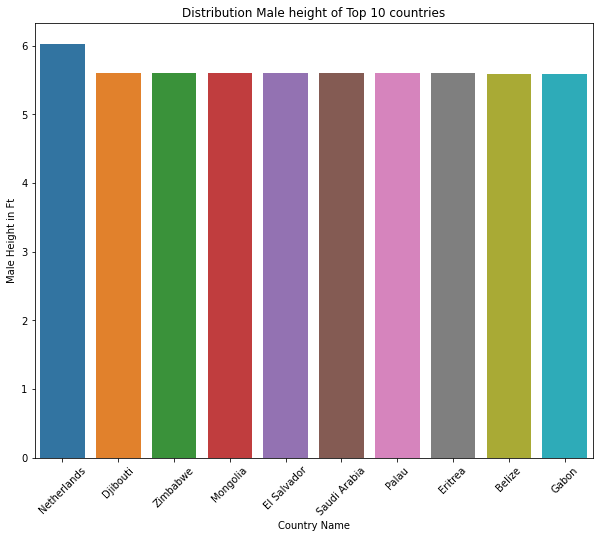

In [80]:
plt.figure(figsize=(10, 8))
plt.title('Distribution Male height of Top 10 countries')
height = sns.barplot(x='Country Name', data=df, order=df['Country Name'].value_counts().index[:10], y='Male Height in Ft')
height.set_xticklabels(height.get_xticklabels(), rotation=45)
plt.show()


Netherlands has the highest bar while the rest of the countries have the same height.
conclusion:
Netherlands has the tallest Males in world followed by Djibouti, Zimbambwe upto Gabon.

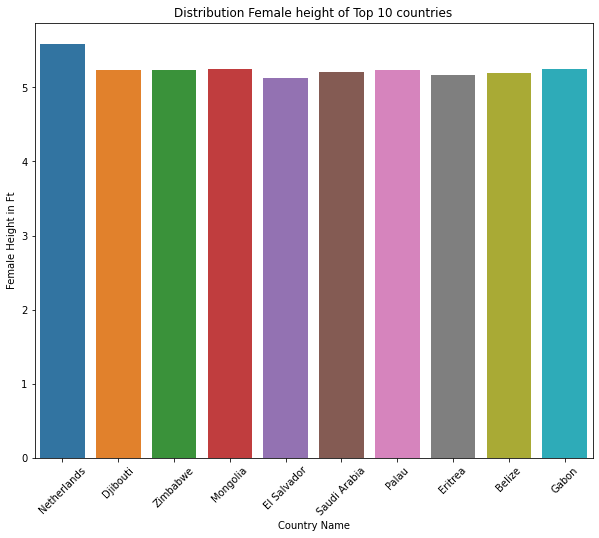

In [81]:
plt.figure(figsize=(10, 8))
plt.title('Distribution Female height of Top 10 countries')
height = sns.barplot(x='Country Name', data=df, order=df['Country Name'].value_counts().index[:10], y='Female Height in Ft')
height.set_xticklabels(height.get_xticklabels(), rotation=45)
plt.show()

Netherlands has the highest bar while the rest has bars that are almost the same.El Salvardor has the lowest bar.
Conclusion:
Netherlands have the tallest females in the world follwed by Djibouti, Zimbambwe and Mongolia while El Salvador has the smallest females in the list.

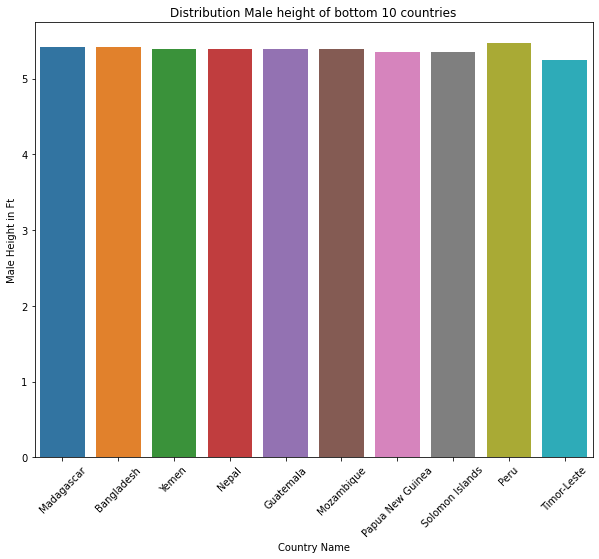

In [82]:
plt.figure(figsize=(10, 8))
plt.title('Distribution Male height of bottom 10 countries')
height = sns.barplot(x='Country Name', data=df, order=df['Country Name'].value_counts().sort_values().index[189:], y='Male Height in Ft')
height.set_xticklabels(height.get_xticklabels(), rotation=45)
plt.show()

Timor-Leste has the lowest bar while Peru has the highest bar in the list.
Conclusion:
Timor_leste has the shortest males in the world followed by Madagascar, Bangladesh, Yemen, Nepal, Guantemala, Mozambique,Papua New Guinea and Solomon Islands.
Peru has the tallest females in the ten countries that have short people.

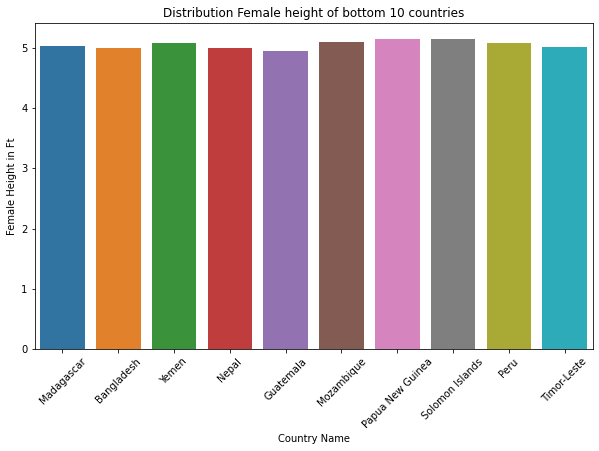

In [83]:
plt.figure(figsize=(10, 6))
plt.title('Distribution Female height of bottom 10 countries')
height = sns.barplot(x='Country Name', data=df, order=df['Country Name'].value_counts().sort_values().index[189:], 
y='Female Height in Ft')
height.set_xticklabels(height.get_xticklabels(), rotation=45)
plt.show()

Guantemala has the lowest bar followed by Nepal and Bangladesh.The rest have bars that have  almost the same height.
coclusion:
Guantemala has the shortest females in the world followed by Nepal.the rest of the countries have almost the same female height

In [84]:
# statistics
df.describe()

,Rank,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000
mean,100.000000,5.678794,5.280402
std,57.590508,0.162510,0.133870
min,1.000000,5.250000,4.950000
25%,50.500000,5.560000,5.190000
50%,100.000000,5.690000,5.270000
75%,149.500000,5.790000,5.375000
max,199.000000,6.030000,5.590000


The describe function shows the mean, qurtiles , minimum and maximum values of each columns.

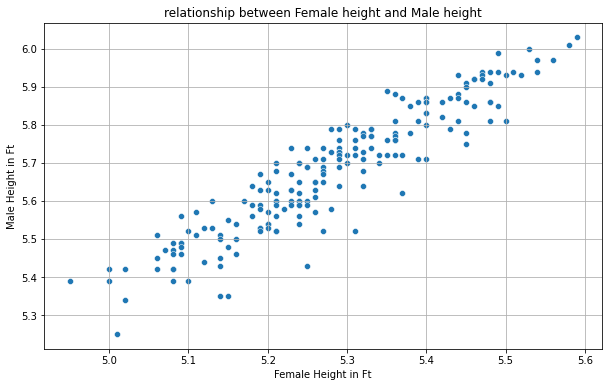

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Female Height in Ft'], y=df['Male Height in Ft'])
plt.title('relationship between Female height and Male height')
plt.grid()
plt.show()

Female Height and Male height have a strong positive linear relationship thus when Female height increases Male height increases too.This shows that the two columns exhibit a strong positive correlation.

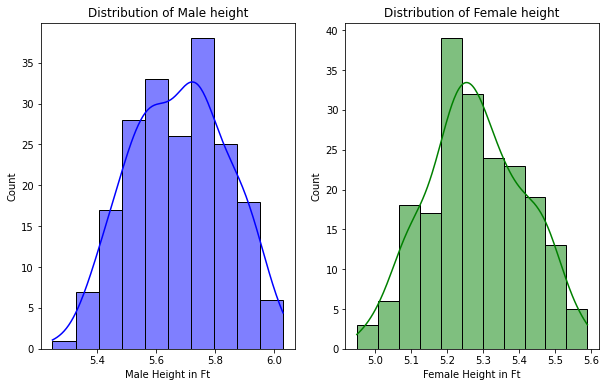

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(x=df['Male Height in Ft'], color='blue', kde=True, ax=axes[0]).set(title='Distribution of Male height')
sns.histplot(x=df['Female Height in Ft'], color='green', kde=True, ax=axes[1]).set(title='Distribution of Female height')
plt.show()

The above histograms shows that they have a normal distribution since the data is concentrated at the center of the data.

Text(0.5, 1.0, 'Correlation between Female height and Male Height')

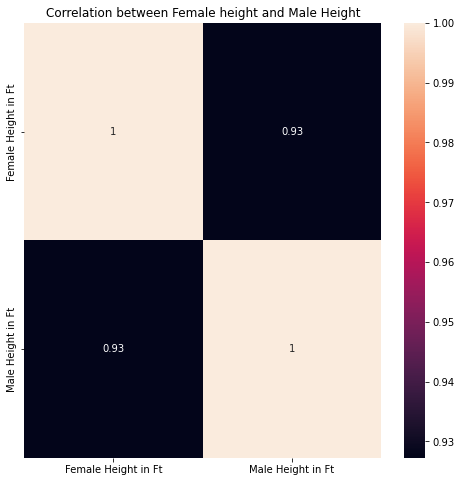

In [87]:
plt.figure(figsize=(8, 8))
dff = df[['Female Height in Ft', 'Male Height in Ft']]
sns.heatmap(dff.corr(), annot=True)
plt.title('Correlation between Female height and Male Height')

Correlation shows the degree of linear relationship between variables.Female height and Male height has the highest positive correlation of 93%.This shows that when Female height increases with a certain multiple, male height increases with almost the same multiple.

In [88]:
# sorting the Female/Male heights by countries
df_clust = df.set_index('Country Name')
df_clust.head()

,Rank,Male Height in Ft,Female Height in Ft
Country Name,,,
Netherlands,1,6.03,5.59
Montenegro,2,6.01,5.58
Estonia,3,6.00,5.53
Bosnia and Herzegovina,4,5.99,5.49
Iceland,5,5.97,5.54


In [89]:
# Dropping the rank column
df_clust.drop(columns=['Rank'], axis=1, inplace=True)

In [90]:
# normalizing our data using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_feat = sc.fit_transform(df_clust)
df_scaled = pd.DataFrame(scaled_feat, columns=df_clust.columns)
df_scaled.head()

,Male Height in Ft,Female Height in Ft
0,2.166579,2.318517
1,2.043200,2.243629
2,1.981510,1.869189
3,1.919821,1.569637
4,1.796441,1.944077


Kmeans clustering

In [91]:
from sklearn.cluster import KMeans
ssd = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust)
    ssd.append(kmeans.inertia_)

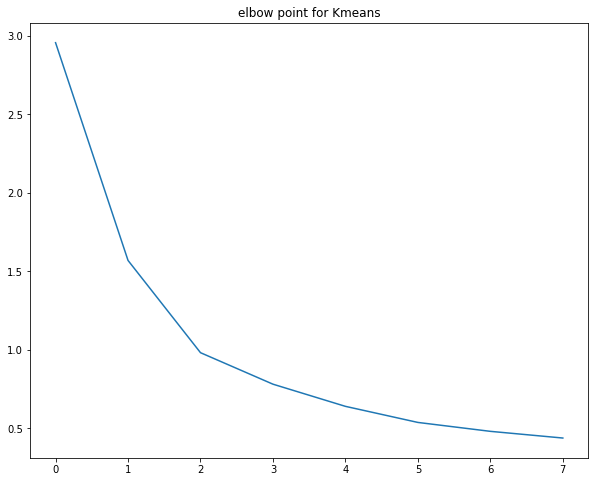

In [92]:
plt.figure(figsize=(10, 8))
plt.plot(ssd)
plt.title('elbow point for Kmeans')
plt.show()

In [93]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_clust)
centres = kmeans.cluster_centers_
labels = kmeans.labels_
df_scaled['cluster_labels'] = labels

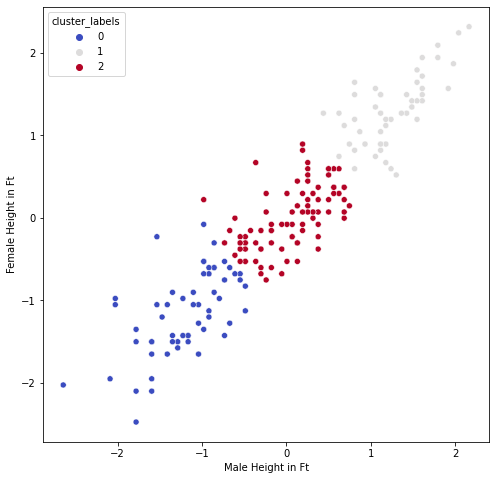

In [94]:
# a plot of the kmeans clusters
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Male Height in Ft', y='Female Height in Ft', data=df_scaled, palette='coolwarm', hue='cluster_labels')
plt.show()

In [95]:
# countries represented by the first cluster
cluster_1 = list(df_scaled[df_scaled.cluster_labels==0].index)
print(cluster_1)

[129, 132, 133, 138, 140, 143, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]


In [96]:
# countries represented by 2nd clusters
cluster_1 = list(df_scaled[df_scaled.cluster_labels==1].index)
print(cluster_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 55, 57, 68]


In [97]:
# countries represented by 3rd clusters
cluster_1 = list(df_scaled[df_scaled.cluster_labels==2].index)
print(cluster_1)

[47, 49, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 134, 135, 136, 137, 139, 141, 142, 144, 147, 160]
